PILAR ARIAS, ÁLVARO GARCÍA CID, YEDRA MARTÍN, AMAYA SARASA

<GRUPO 7>

#INTRODUCCIÓN

En este proyecto se va a proceder a realizar un proyecto de creación de una red neuronal que nos permita solucionar un problema de regresión.

Para tomar el tema sobre el cual va a tratar este proyecto se ha decidido buscar un tema que en la actualidad pueda resultar útil. Por ello, debido al auge de la tecnología en nuestro día a día se ha considerado que un buen problema sería realizar una predicción acerca de la duración de la batería de un móvil, en función de diversos datos.

Se importa keras

In [ ]:
import keras
keras.__version__

'2.9.0'

# Prediciendo la duración de la batería de un movil
Vamos a predecir la duración de la batería de un teléfono movil dados algunos datos como los píxeles de la cámara, si tiene o no conexión wifi, la cantidad de cores del procesador, etc. 

El conjunto de datos tiene un total de 2000 datos, que dividiremos entre 1750 de entrenamiento (de los cuales 500 serán para validación) y 250 de test. Las 21 carácaterísticas en los datos de entrada (por ejemplo, si tiene o no v) es una característica que tiene una escala diferente. Por ejemplo, algunos valores son proporciones, que toman valores entre 0 y 1, otros toman valores entre 1 y 12, otros entre 0 y 100 ...



In [44]:
import pandas as pd
datos=pd.read_csv('train.csv',encoding='latin-1')
datos.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Comprobamos que se han importado correctamente, los 2000 datos con 21 características. 

In [45]:
datos.shape

(2000, 21)

Separamos los datos en entrenamiento y test y sus correspondientes soluciones, que serán la característica 17 (talk_time) que según explicaba la página donde hemos tomado la base, es el tiempo que dura el móvil desde su última carga. 


In [46]:
labels=datos.talk_time
labels.shape


(2000,)

In [47]:
datos=datos.drop(['talk_time'],axis=1)

In [48]:
datos.shape

(2000, 20)

In [49]:
train_datos=datos[:1750]
test_datos=datos[1751:]

train_labels=labels[:1750]
test_labels=labels[1751:]

In [57]:
train_datos

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,three_g,touch_screen,wifi,price_range
0,-0.916707,-0.971548,0.824814,-1.019330,-0.766188,-1.048910,-1.393075,0.344853,1.329859,-1.089541,-1.300605,-1.411109,-1.156859,0.381544,-0.797901,0.272778,-1.795887,-1.005443,0.982721,-0.463261
1,-0.508090,1.028697,-1.248020,0.980476,-0.994569,0.952826,1.149321,0.692087,-0.141099,-0.655115,-0.642927,0.576946,1.709056,0.456812,1.101540,-0.640395,0.556510,0.994018,-1.017002,0.435527
2,-1.553603,1.028697,-1.248020,0.980476,-0.537806,0.952826,0.486087,1.386555,0.113490,0.213738,-0.642927,1.381154,1.076321,0.431111,-0.323041,-0.868689,0.556510,0.994018,-1.017002,0.435527
3,-1.434898,1.028697,1.190608,-1.019330,-0.994569,-1.048910,-1.227267,1.039321,-0.282537,0.648164,-0.149669,1.275574,1.239157,0.583482,0.864110,0.501071,0.556510,-1.005443,-1.017002,0.435527
4,1.318135,1.028697,-0.394500,-1.019330,1.974391,0.952826,0.651896,0.344853,0.000339,-1.089541,0.672428,1.257603,-0.096099,-0.663023,-1.035331,-0.868689,0.556510,0.994018,-1.017002,-0.463261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,-0.724954,1.028697,-0.882226,-1.019330,0.375720,0.952826,1.480938,1.039321,0.566092,1.082591,0.672428,-1.267340,-1.070789,-1.723195,1.338970,0.272778,0.556510,-1.005443,0.982721,-1.362050
1746,0.039778,-0.971548,-1.248020,-1.019330,-0.309424,0.952826,1.094052,-0.696849,-1.555481,-1.089541,-0.149669,-0.096971,0.408693,-0.705247,-0.797901,-0.640395,0.556510,-1.005443,0.982721,-0.463261
1747,-1.428050,-0.971548,-0.516432,-1.019330,1.517628,0.952826,0.707165,-1.044083,1.329859,-0.655115,1.658945,1.183472,0.773911,0.188786,1.576400,-0.868689,0.556510,0.994018,-1.017002,0.435527
1748,-0.702126,1.028697,0.946745,-1.019330,0.147339,0.952826,1.370399,-1.044083,-0.339112,-1.089541,-0.642927,0.019841,-0.733486,-0.077404,-0.085610,0.501071,0.556510,0.994018,-1.017002,-0.463261


In [51]:
train_labels[0]

19

In [52]:
train_datos.shape

(1750, 20)

Una vez tenemos los datos separados, vamos a normalizarlos, puesto que cada uno tienen rangos distintos. 

In [58]:
# Normalizamos basándonos en la característica
##############################################
# Calculamos la media del primer eje de los datos de entrenamiento
mean = train_datos.mean(axis=0)
print("##### Media de las 20 características de los datos de entrenamiento ##### ")
print(mean)
# A los datos de entrenamiento le restamos la media
train_datos -= mean

# Calculamos la desviación estandar del primer eje de los datos de entrenamiento
std = train_datos.std(axis=0)
print("##### Desviación estandar de las 20 características de los datos de entrenamiento ##### ")
print(std)
# A los datos de entrenamiento los dividimos por la desviación estándar
train_datos /= std

# ¡¡IMPORTANTE!!: USAMOS LA MEDIA Y LA DESVIACIÓN ESTANDAR DE LOS DATOS DE 
# ENTRENAMIENTO PARA NORMALIZAR EL SET DE DATOS DE LOS DATOS DE TEST 
test_datos -= mean
test_datos /= std

##### Media de las 20 características de los datos de entrenamiento ##### 
battery_power    3.248195e-17
blue            -1.218073e-17
clock_speed      6.496391e-17
dual_sim         8.272748e-17
fc              -8.120488e-18
four_g          -6.090366e-17
int_memory      -1.685001e-16
m_dep           -1.827110e-17
mobile_wt        1.624098e-17
n_cores         -2.436147e-17
pc              -1.177471e-16
px_height        3.045183e-17
px_width        -1.999670e-16
ram              2.436147e-17
sc_h            -1.258676e-16
sc_w            -2.537653e-17
three_g         -7.308440e-17
touch_screen    -1.258676e-16
wifi            -1.218073e-17
price_range      4.872293e-17
dtype: float64
##### Desviación estandar de las 20 características de los datos de entrenamiento ##### 
battery_power    1.0
blue             1.0
clock_speed      1.0
dual_sim         1.0
fc               1.0
four_g           1.0
int_memory       1.0
m_dep            1.0
mobile_wt        1.0
n_cores          1.0
pc         

## CREAMOS LA RED

Como tenemos una base de datos tan pequeña, vamos a crear una base de datos muy pequeña con únicamente dos capas ocultas. 
 En general, cuantos menos datos de entrenamiento tengamos, peor será el sobreajuste y el uso una red pequeña es una forma de reducir el sobreajuste.

In [ ]:
import tensorflow as tf
from keras import models
from keras import layers

def build_model():
    # Porque necesitaremos instanciar el mismo modelo 
    # múltiples veces, usamos una función para construirlo
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_datos.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    # MSE: Mean Squared Error
    # MAE: Mean Absolute Error
    model.compile(optimizer='rmsprop', loss='mse', 
                  metrics=[tf.keras.metrics.MeanAbsoluteError()]) # metrics = ['mae']
    return model

Con estos datos, computamos el problema con las primeras 3/4 partes de los datos de entrenamiento para entrenar y el último 1/4 de los datos para validación

In [ ]:
partial_train_datos = train_datos[:1500]
partial_eval_train_datos = train_datos[1501:]
partial_train_labels = train_labels[:1500]
partial_eval_train_labels= train_labels[1501:]

In [ ]:
mymodel = build_model()

In [ ]:
history = mymodel.fit(partial_train_datos, partial_train_labels,
            validation_data=(partial_eval_train_datos, partial_eval_train_labels),
                        epochs=40, batch_size=1)

Epoch 1/40
1500/1500 [==============================] - 4s 2ms/step - loss: 38.0918 - mean_absolute_error: 5.1954 - val_loss: 34.9870 - val_mean_absolute_error: 5.0493
Epoch 2/40
1500/1500 [==============================] - 3s 2ms/step - loss: 30.9963 - mean_absolute_error: 4.7509 - val_loss: 34.9648 - val_mean_absolute_error: 5.0742
Epoch 3/40
1500/1500 [==============================] - 3s 2ms/step - loss: 30.1800 - mean_absolute_error: 4.6537 - val_loss: 35.4249 - val_mean_absolute_error: 5.1196
Epoch 4/40
1500/1500 [==============================] - 3s 2ms/step - loss: 29.2421 - mean_absolute_error: 4.5983 - val_loss: 35.8415 - val_mean_absolute_error: 5.1262
Epoch 5/40
1500/1500 [==============================] - 4s 3ms/step - loss: 28.8500 - mean_absolute_error: 4.5645 - val_loss: 35.6420 - val_mean_absolute_error: 5.1726
Epoch 6/40
1500/1500 [==============================] - 4s 2ms/step - loss: 28.2886 - mean_absolute_error: 4.5133 - val_loss: 36.0715 - val_mean_absolute_error:

In [ ]:
mae_history = history.history['val_mean_absolute_error']

In [ ]:
mse_history = history.history['val_loss']

Confrontamos en una gráfica las épocas frente a la pérdida pérdida (MSE)

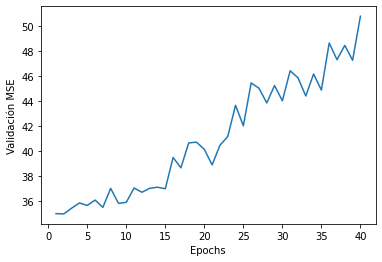

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(mse_history) + 1), mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MSE')
plt.show()

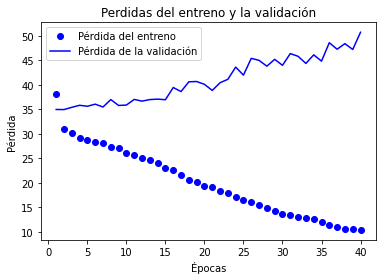

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

Confrontamos en una gráfica las épocas contra la métrica de error absoluto medio (MAE)

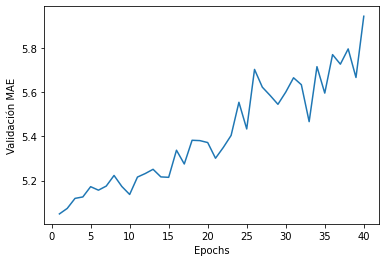

In [ ]:
 import matplotlib.pyplot as plt

plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

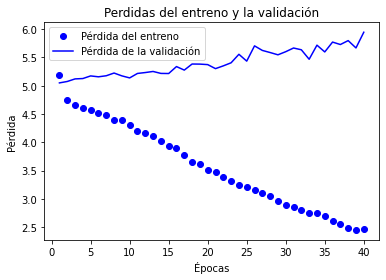

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['mean_absolute_error']
val_loss = history.history['val_mean_absolute_error']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()